In [1]:
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rich import print, inspect, traceback, pretty

from chaotic_carbon_networks.preprocessing import concat_data
from chaotic_carbon_networks.adjencency_matrix import calc_adjacency_matrix
from chaotic_carbon_networks.utils import mask_oceans, plot_world, mask_population

sns.set_theme(context='paper', style="whitegrid", palette="Set2", font_scale=1.5, rc={'figure.figsize':(9,6)})
pretty.install()
traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f10c6ce90d0>>

In [2]:
def anomaly_correction_month(co2: xr.DataArray):
    """Corrects the GRACE anomalies for the seasonal cycle"""
    co2 = co2.groupby("time.month") - co2.groupby("time.month").mean("time", keep_attrs=True)
    co2.attrs = {"units": "d kgC/h", "long_name": "Carbon Dioxide Emissions Anomaly"}
    return co2

def anomaly_correction_spatial(co2: xr.DataArray):
    """Corrects the GRACE anomalies for the spatial mean"""
    co2 = co2 - co2.mean("lat", keep_attrs=True).mean("lon", keep_attrs=True)
    co2.attrs = {"units": "d kgC/h", "long_name": "Carbon Dioxide Emissions Anomaly"}
    return co2

Loading cached data from 
/home/tobias/Repositories/chaotic-carbon-networks/data/graced/cache/co2_concat_20x20_meaned_weekdayly.nc

Loading cached data from 
/home/tobias/Repositories/chaotic-carbon-networks/data/population/cache/GHS_POP_E2020_GLOBE_R2023A_4326_30ss_V1_0_r
esampled.nc

<xarray.DataArray 'emission' (time: 225, lat: 90, lon: 180)> Size: 15MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat          (lat) float64 720B 89.0 87.0 85.0 83.0 ... -85.0 -87.0 -89.0
  * lon          (lon) float64 1kB -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 2kB 2019-01-04 2019-01-11 ... 2023-06-21
    weekday      (time) float64 2kB 3.0 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0 3.0
    band         int64 8B ...
    spatial_ref  int64 8B ...
Attributes:
    units:      d kgC/h
    long_name:  Carbon Dioxide Emissions Anomaly

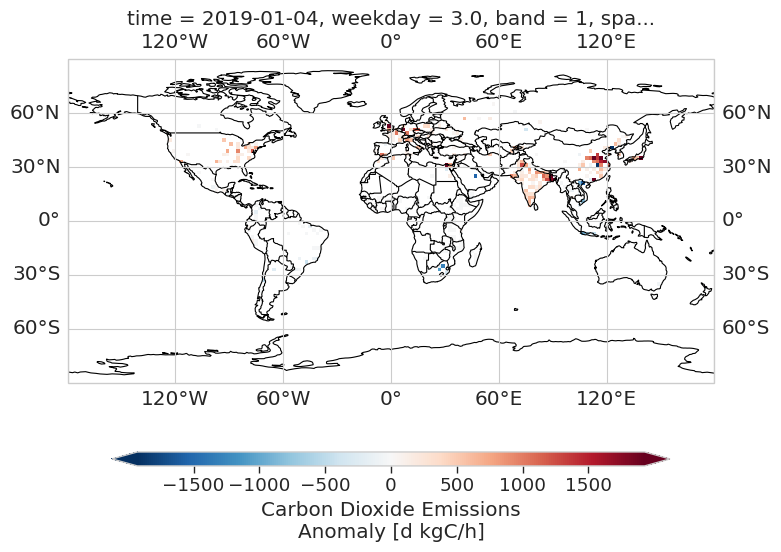

In [3]:
co2 = concat_data(20, correctby="weekday") # Data is already anomaly corrected by weekday
co2 = co2.coarsen(time=7, boundary="trim").mean()

# Anomaly Correction
# co2 = anomaly_correction_spatial(co2)
# co2 = anomaly_correction_month(co2)

# Masking
co2 = mask_population(co2)
#co2 = mask_oceans(co2)

plot_world(co2.isel(time=0))
co2

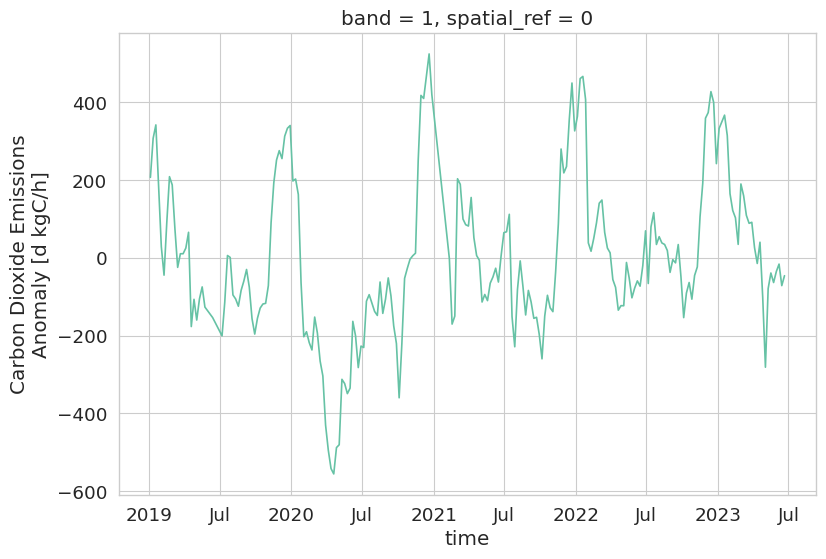

In [4]:
co2.mean(dim=["lat", "lon"], keep_attrs=True).plot()

0.7723537305583327


<xarray.DataArray (vertex_i: 16200, vertex_j: 16200)> Size: 2GB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Dimensions without coordinates: vertex_i, vertex_j
Attributes:
    long_name:     Adjacency matrix of Carbon Dioxide Emissions Anomaly
    var_desc:      Connected
    units:         c
    valid_range:   (0, 1)
    actual_range:  (0, 1)

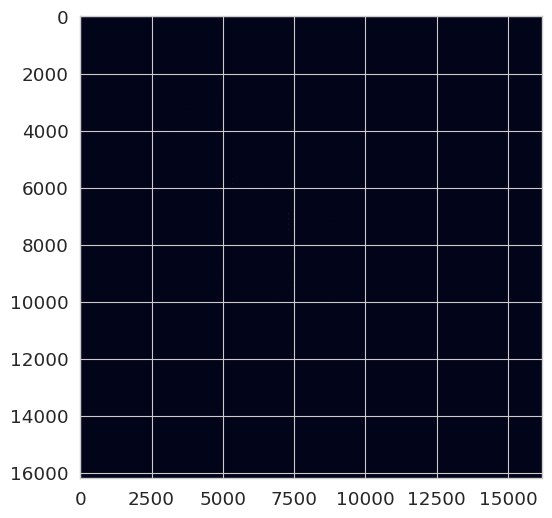

In [5]:
adjacency_matrix = calc_adjacency_matrix(co2)
plt.imshow(adjacency_matrix.values)
plt.draw()
adjacency_matrix

<xarray.DataArray (lat: 90, lon: 180)> Size: 130kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * lat      (lat) float64 720B 89.0 87.0 85.0 83.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float64 1kB -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0

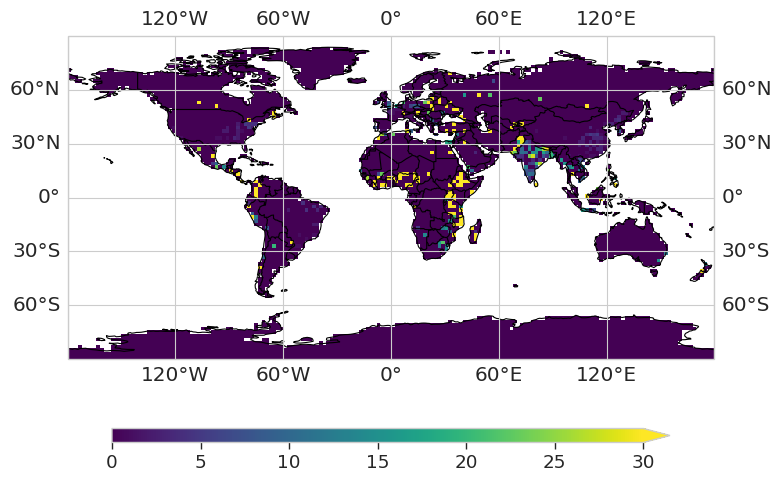

In [6]:
degrees = adjacency_matrix.sum(dim="vertex_j", keep_attrs=True)
degrees = xr.DataArray(degrees.values.reshape(co2.shape[1:]), dims=("lat", "lon"), coords={"lat": co2.lat, "lon": co2.lon})
degrees = mask_oceans(degrees)
plot_world(degrees)
degrees